# Visualizing CNN filters

In [2]:
# Visualize Filters (Weights) of a Layer
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

# Load the VGG16 model (without top)
model = VGG16(weights='imagenet', include_top=False)

# Get the weights of a specific conv layer
layer = model.get_layer('block1_conv1')
filters, biases = layer.get_weights()

print("Filters shape:", filters.shape)  # e.g., (3, 3, 3, 64)

# Normalize filter values to 0-1 for display
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


Filters shape: (3, 3, 3, 64)


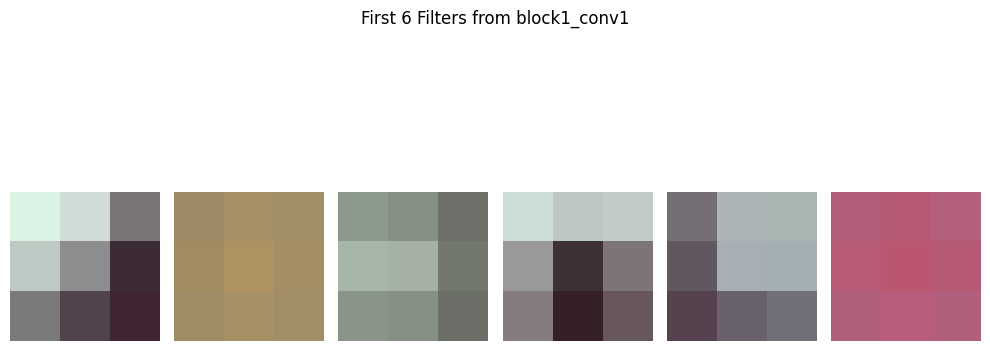

In [3]:
# Plot First 6 Filters (Only 1st Channel for RGB visualization)
n_filters = 6
plt.figure(figsize=(10, 5))
for i in range(n_filters):
    f = filters[:, :, :, i]
    # Only show the RGB view of the filter (may not be meaningful for deeper layers)
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f[:, :, :3])
    plt.axis('off')
plt.suptitle("First 6 Filters from block1_conv1")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


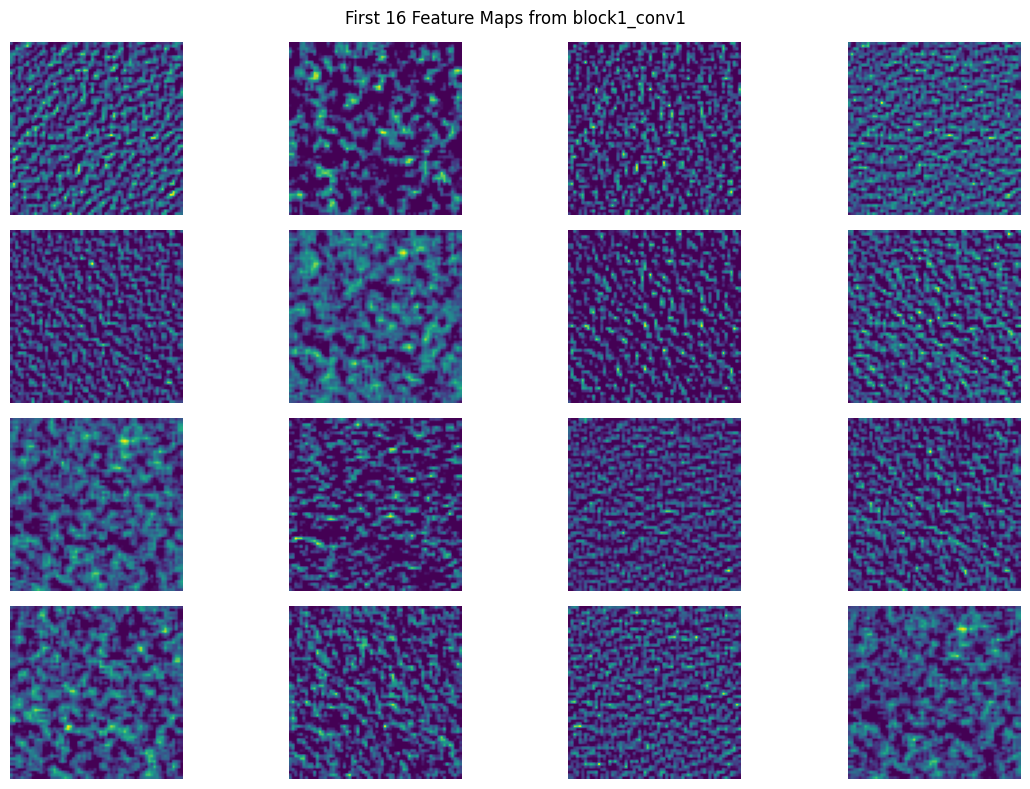

In [4]:
# Visualize Feature Maps
from tensorflow.keras.models import Model
import numpy as np

# Create a model to extract feature maps
feature_model = Model(inputs=model.input, outputs=model.get_layer('block1_conv1').output)

# Generate a dummy image or use your own (ensure shape is 64x64x3)
img = np.random.rand(1, 64, 64, 3)
img = (img - 0.5) * 2  # VGG16 preprocessing

# Get feature maps
feature_maps = feature_model.predict(img)

# Plot first 16 feature maps
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle("First 16 Feature Maps from block1_conv1")
plt.tight_layout()
plt.show()
